## Module Name: Featurisation and Model Tuning

### Name: Priyanka Balakrishna Hejmadi

Domain: Semiconductor manufacturing process

PROJECT OBJECTIVE: We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the
features are required to build the model or not.

#### 1. Import and understand the data [5 marks]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# A. Import ‘signal-data.csv’ as DataFrame. [2 Marks]
signal_df= pd.read_csv("signal-data.csv")

In [3]:
# B. Print 5 point summary and share at least 2 observations. [3 Marks]
signal_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


Observations: 
1. There is a column with zero standard deviation.
2. Most of the columns have missing values.
3. The columns are in different scales and need to be standardized.
4. Some columns have absurdly large outliers.

In [4]:
# A. Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature. [5 Marks]
signal_df.isnull().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [5]:
thres = np.round(signal_df.shape[0]*0.20)
thres

313.0

In [6]:
for feature in signal_df.columns:
    if signal_df[feature].isnull().sum() > thres:
        signal_df.drop([feature], axis=1,inplace=True)
    elif signal_df[feature].isnull().sum() > 0:
        signal_df.fillna(signal_df.mean(), inplace=True)

In [7]:
print(signal_df.isnull().sum())

Time         0
0            0
1            0
2            0
3            0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 592, dtype: int64


In [8]:
# B. Identify and drop the features which are having same value for all the rows. [3 Marks]
for feature in signal_df.columns:
    if signal_df[feature].dtypes=='float64':
        if signal_df[feature].std() ==0:
            signal_df.drop([feature], axis=1,inplace=True) 

In [9]:
signal_df.shape

(1567, 476)

In [10]:
# C. Drop other features if required using relevant functional knowledge. Clearly justify the same. [2 Marks]
signal_df.drop(['Time'], axis=1, inplace = True) # Dropping time because it os just a timestamp and doesn't contribute to prediction
# There are no other features that can be dropped at the moment

In [11]:
# D. Check for multi-collinearity in the data and take necessary action. [3 Marks]
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [12]:
vif = calc_vif(signal_df)

C:\Users\priya\anaconda3\envs\Tensorflow\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [13]:
vif

,variables,VIF
0,0,24862.049742
1,1,10043.928211
2,2,160482.992728
3,3,130.307966
4,4,43769.459746
...,...,...
470,586,14.527184
471,587,233.511721
472,588,222.671292
473,589,9.281542


Many features have a very high VIF indicating that they are highly correlated. We drop these features.

In [14]:
features = vif[vif['VIF']>10]['variables']
features

0        0
1        1
2        2
3        3
4        4
      ... 
468    584
469    585
470    586
471    587
472    588
Name: variables, Length: 436, dtype: object

In [15]:
for f in features:
    signal_df.drop([f],axis=1, inplace=True)

In [16]:
signal_df.head()

,9,10,24,41,59,75,76,77,78,79,...,486,487,488,489,499,500,511,521,589,Pass/Fail
0,0.0162,-0.0034,751.00,4.515,-1.7264,0.0126,-0.0206,0.0141,-0.0307,-0.0083,...,843.1138,0.0000,53.1098,0.0000,0.0000,0.0000,0.0000,0.0,99.670066,-1
1,-0.0005,-0.0148,-1640.25,2.773,0.8073,-0.0039,-0.0198,0.0004,-0.0440,-0.0358,...,130.6350,820.7900,194.4371,0.0000,0.0000,0.0000,0.0000,0.0,208.204500,-1
2,0.0041,0.0013,-1916.50,5.434,23.8245,-0.0078,-0.0326,-0.0052,0.0213,-0.0054,...,746.9150,74.0741,191.7582,250.1742,0.0000,0.0000,244.2748,0.0,82.860200,1
3,-0.0124,-0.0033,-1657.25,1.279,24.3791,-0.0555,-0.0461,-0.0400,0.0400,0.0676,...,104.6660,71.7583,0.0000,336.7660,0.0000,711.6418,0.0000,0.0,73.843200,-1
4,-0.0031,-0.0072,117.00,2.209,-12.2945,-0.0534,0.0183,-0.0167,-0.0449,0.0034,...,0.0000,587.3773,748.1781,0.0000,293.1396,0.0000,0.0000,0.0,73.843200,-1


In [17]:
calc_vif(signal_df)

,variables,VIF
0,9,1.104884
1,10,1.114022
2,24,1.060767
3,41,2.965775
4,59,1.463776
5,75,1.311088
6,76,2.466885
7,77,1.176960
8,78,1.859992
9,79,1.359831


Now we have a reduced dataset which has fairly independent features.

In [18]:
# E. Make all relevant modifications on the data using both functional/logical reasoning/assumptions. [2 Marks]
signal_df.describe()

,9,10,24,41,59,75,76,77,78,79,...,486,487,488,489,499,500,511,521,589,Pass/Fail
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,-0.000841,0.000146,-298.598136,3.353066,2.960241,-0.006903,-0.029390,-0.007041,-0.013643,0.003458,...,302.506186,239.455326,352.616477,272.169707,263.195864,240.981377,275.979457,11.610080,99.670066,-0.867262
std,0.015107,0.009296,2900.835956,2.342268,9.510891,0.022121,0.032948,0.031127,0.047504,0.022902,...,285.153545,261.808095,250.104924,226.292471,324.563886,322.797084,329.454099,103.122996,93.861936,0.498010
min,-0.053400,-0.034900,-14804.500000,-0.075900,-28.988200,-0.104900,-0.186200,-0.104600,-0.348200,-0.056800,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,-0.010800,-0.005600,-1474.375000,2.699000,-1.855450,-0.019200,-0.051350,-0.029400,-0.047300,-0.010700,...,0.000000,57.316900,145.156850,113.806650,0.000000,0.000000,0.000000,0.000000,44.368600,-1.000000
50%,-0.001300,0.000400,-80.500000,3.080000,0.973600,-0.006600,-0.029390,-0.009400,-0.013643,0.000800,...,260.141800,114.596600,352.511400,221.507500,0.000000,0.000000,0.000000,0.000000,72.023000,-1.000000
75%,0.008400,0.005900,1376.250000,3.515000,4.337700,0.006600,-0.006900,0.008900,0.012050,0.012800,...,497.384500,391.277500,507.497050,372.341900,536.122600,505.225750,554.010700,0.000000,114.749700,-1.000000
max,0.074900,0.053000,14106.000000,37.880000,168.145500,0.231500,0.072300,0.133100,0.249200,0.101300,...,999.491100,995.744700,997.518600,994.003500,1000.000000,999.233700,1000.000000,1000.000000,737.304800,1.000000


<AxesSubplot:xlabel='521'>

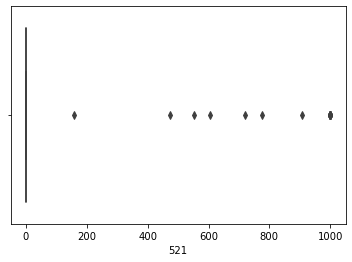

In [19]:
sns.boxplot(data= signal_df, x='521')

There are some columns with many zero values. We drop them if they have more than half the values as zeros.

In [20]:
drop_cols = signal_df.columns[(signal_df == 0).sum() > 0.5*signal_df.shape[1]]
signal_df.drop(drop_cols, axis = 1, inplace = True) 

In [21]:
signal_df.describe()

,9,10,24,41,59,75,76,77,78,79,80,81,82,Pass/Fail
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,-0.000841,0.000146,-298.598136,3.353066,2.960241,-0.006903,-0.029390,-0.007041,-0.013643,0.003458,-0.018531,-0.021153,0.006055,-0.867262
std,0.015107,0.009296,2900.835956,2.342268,9.510891,0.022121,0.032948,0.031127,0.047504,0.022902,0.048847,0.016890,0.035797,0.498010
min,-0.053400,-0.034900,-14804.500000,-0.075900,-28.988200,-0.104900,-0.186200,-0.104600,-0.348200,-0.056800,-0.143700,-0.098200,-0.212900,-1.000000
25%,-0.010800,-0.005600,-1474.375000,2.699000,-1.855450,-0.019200,-0.051350,-0.029400,-0.047300,-0.010700,-0.042950,-0.027100,-0.017350,-1.000000
50%,-0.001300,0.000400,-80.500000,3.080000,0.973600,-0.006600,-0.029390,-0.009400,-0.013643,0.000800,-0.009300,-0.019900,0.006700,-1.000000
75%,0.008400,0.005900,1376.250000,3.515000,4.337700,0.006600,-0.006900,0.008900,0.012050,0.012800,0.008700,-0.012150,0.026800,-1.000000
max,0.074900,0.053000,14106.000000,37.880000,168.145500,0.231500,0.072300,0.133100,0.249200,0.101300,0.118600,0.058400,0.143700,1.000000


In [22]:
signal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   9          1567 non-null   float64
 1   10         1567 non-null   float64
 2   24         1567 non-null   float64
 3   41         1567 non-null   float64
 4   59         1567 non-null   float64
 5   75         1567 non-null   float64
 6   76         1567 non-null   float64
 7   77         1567 non-null   float64
 8   78         1567 non-null   float64
 9   79         1567 non-null   float64
 10  80         1567 non-null   float64
 11  81         1567 non-null   float64
 12  82         1567 non-null   float64
 13  Pass/Fail  1567 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 171.5 KB


Now we have a clean dataframe with 13 features and a target variable.

#### 3. Data analysis & visualisation: [5 Marks]


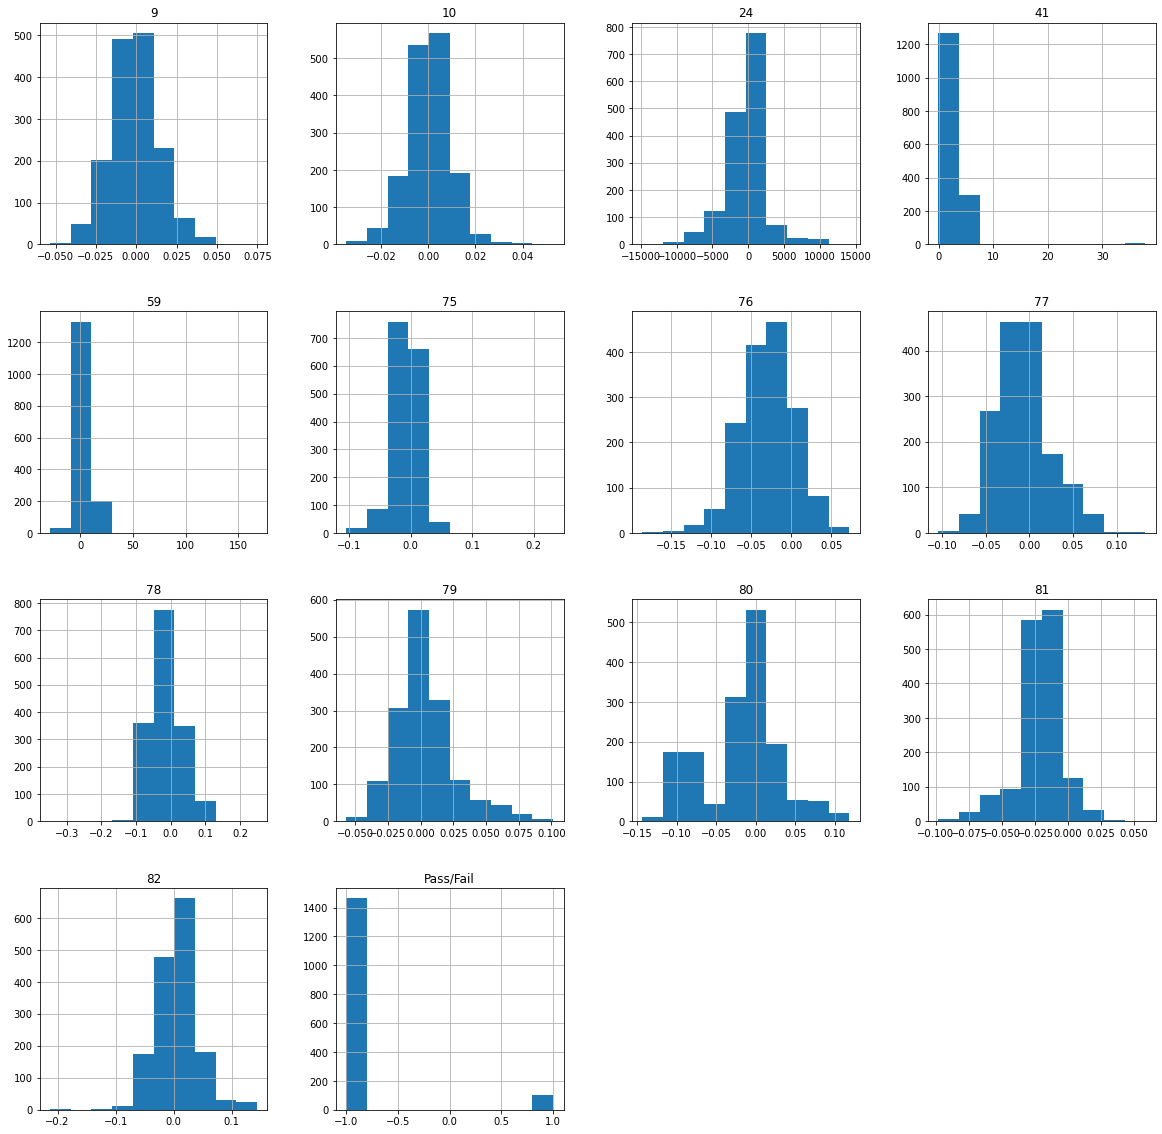

In [23]:
# A. Perform a detailed univariate Analysis with appropriate detailed comments after each analysis. [2 Marks]
signal_df.hist(figsize=(20,20));

From the above histogram plots we see that most features are uni-modal while one of them is bimodal. The features have long tails which need to be normalized. The features are also in different scales.

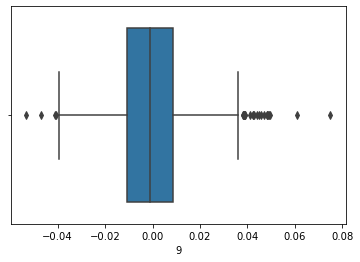

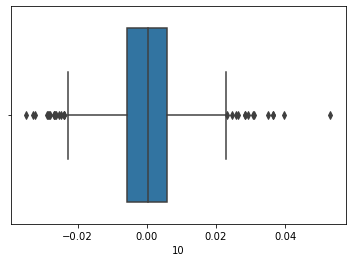

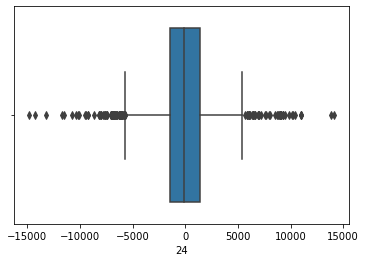

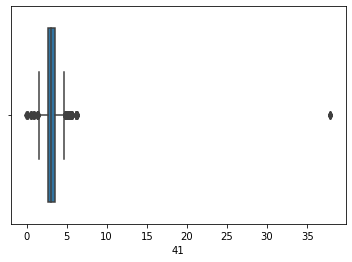

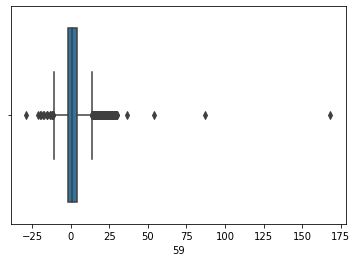

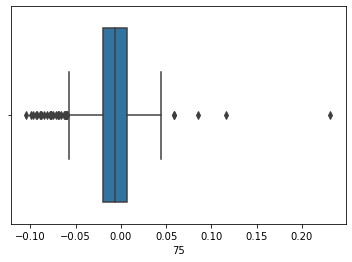

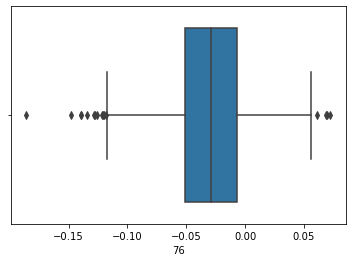

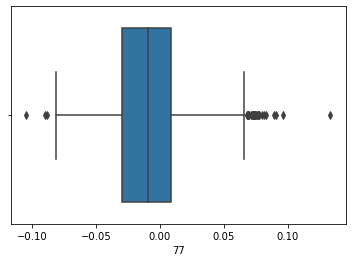

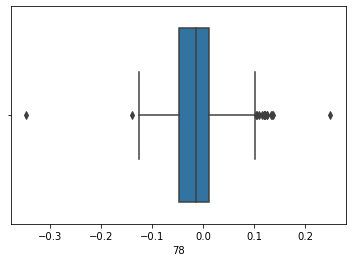

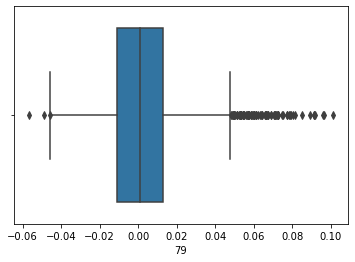

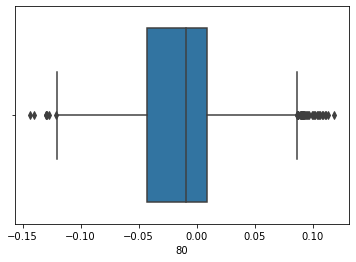

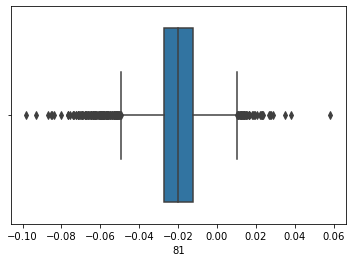

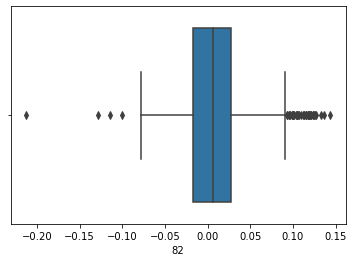

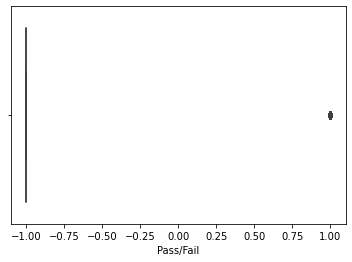

In [24]:
for feature in signal_df.columns:
    sns.boxplot(data= signal_df, x=feature)
    plt.show()

From the above box plot we see that many of them have outliers. We have to remove the datapoints with the outliers using IQR.

In [25]:
Q1 = signal_df.quantile(0.25)
Q3 = signal_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

9               0.01920
10              0.01150
24           2850.62500
41              0.81600
59              6.19315
75              0.02580
76              0.04445
77              0.03830
78              0.05935
79              0.02350
80              0.05165
81              0.01495
82              0.04415
Pass/Fail       0.00000
dtype: float64


In [26]:
IQR['Pass/Fail']=2 # We do not want to modify this column. Hence increase value of IQR for that feature.

In [27]:
signal_df_out = signal_df[~((signal_df < (Q1 - 2 * IQR)) |(signal_df > (Q3 + 2 * IQR))).any(axis=1)]
# 2 times IQR is used to remove only the extreme outliers as 1.5 times IQR results in significant loss of data.

In [28]:
signal_df_out.describe()

,9,10,24,41,59,75,76,77,78,79,80,81,82,Pass/Fail
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.00000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,-0.000626,-0.000225,-306.208848,3.104733,0.715982,-0.004681,-0.025767,-0.007950,-0.00811,-0.000066,-0.016499,-0.019239,0.006482,-0.897390
std,0.014325,0.008764,2313.184171,0.653432,4.601320,0.017854,0.031945,0.030726,0.04608,0.018226,0.044343,0.012465,0.032433,0.441437
min,-0.047200,-0.028200,-7093.333300,1.427000,-13.357300,-0.061900,-0.125800,-0.104600,-0.12720,-0.056800,-0.143700,-0.056700,-0.077600,-1.000000
25%,-0.010550,-0.005700,-1413.375000,2.705000,-2.007300,-0.017250,-0.047300,-0.030750,-0.03920,-0.011300,-0.029150,-0.025650,-0.014100,-1.000000
50%,-0.001200,0.000000,-99.750000,3.070000,0.485500,-0.005100,-0.025300,-0.011400,-0.00740,-0.000700,-0.008700,-0.019500,0.006700,-1.000000
75%,0.008550,0.005700,1327.375000,3.396000,2.988200,0.008000,-0.003350,0.008350,0.01680,0.010200,0.007700,-0.011900,0.025850,-1.000000
max,0.046800,0.028500,7029.000000,5.143000,16.649100,0.043900,0.072300,0.082900,0.12570,0.059300,0.109300,0.016700,0.115000,1.000000


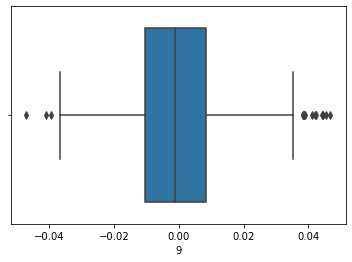

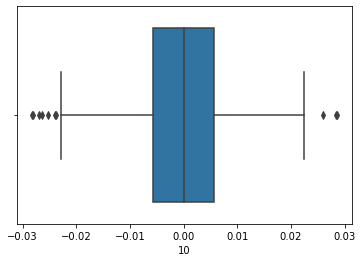

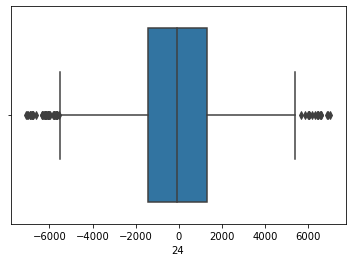

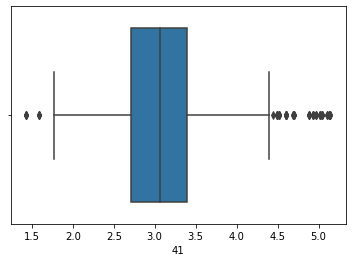

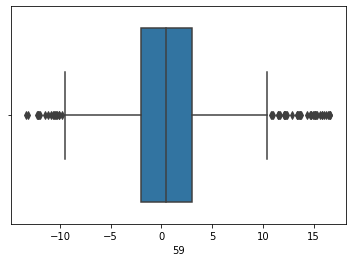

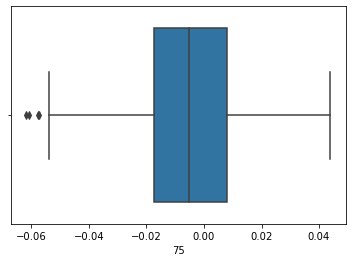

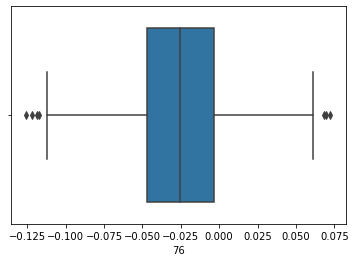

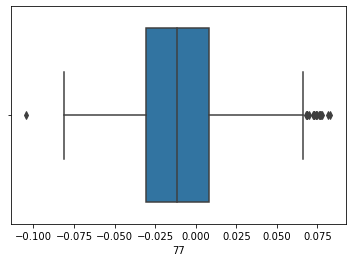

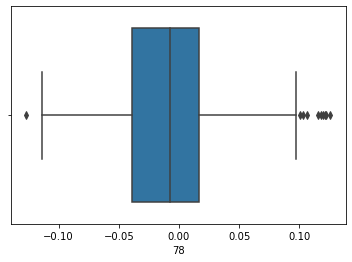

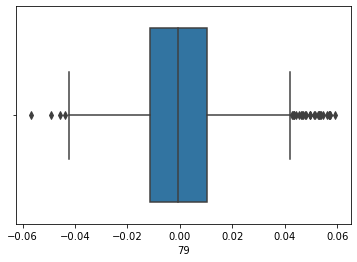

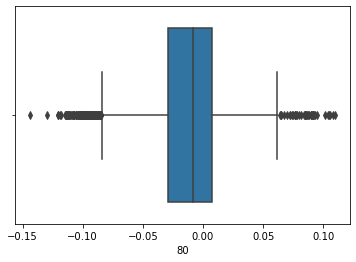

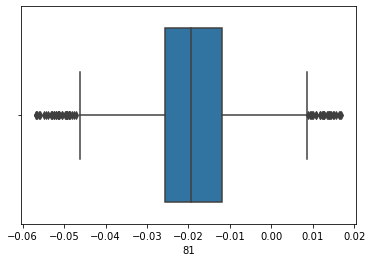

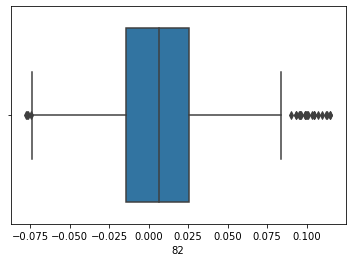

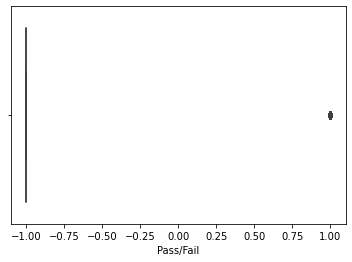

In [29]:
for feature in signal_df.columns:
    sns.boxplot(data= signal_df_out, x=feature)
    plt.show()

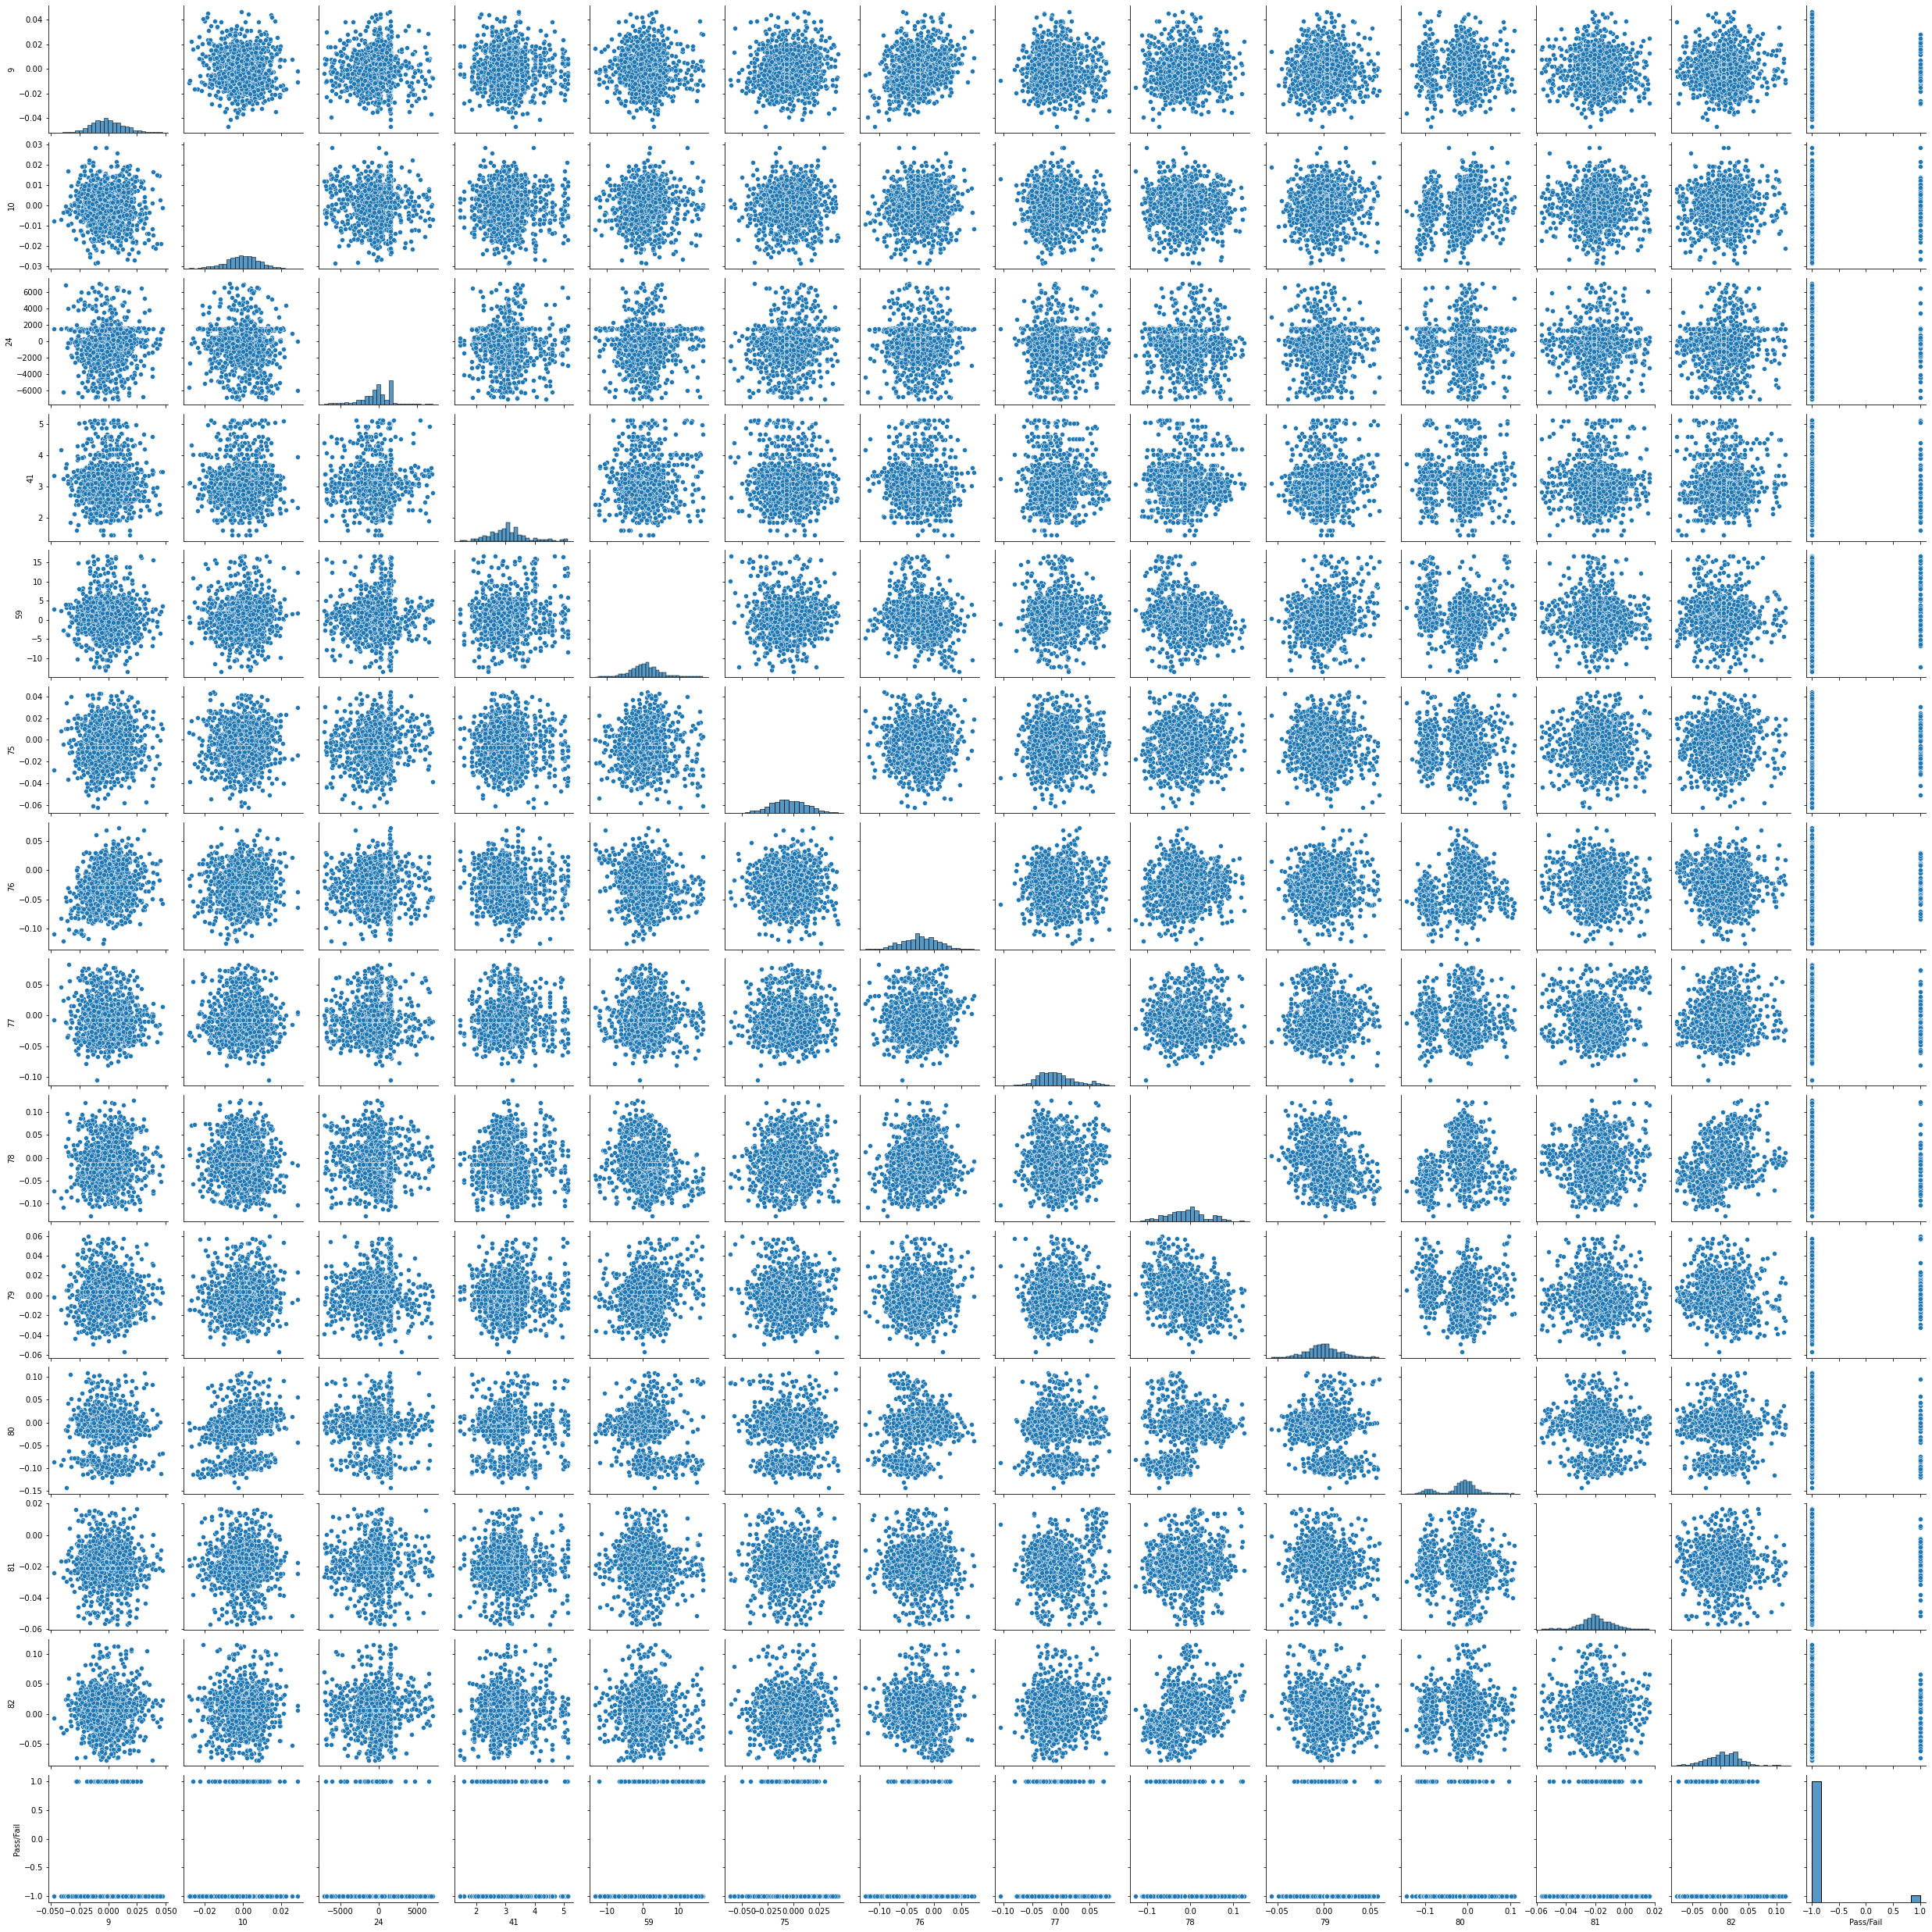

In [30]:
 # B. Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis. [3 Marks]
sns.pairplot(signal_df_out);

As we see in the above paiplot, the features are independent of each other.

#### 4. Data pre-processing: [10 Marks]

In [31]:
# A. Segregate predictors vs target attributes. [2 Marks]
X= signal_df_out.drop('Pass/Fail', axis=1)
y= signal_df_out['Pass/Fail']

In [32]:
X.head()

,9,10,24,41,59,75,76,77,78,79,80,81,82
0,0.0162,-0.0034,751.00,4.515,-1.7264,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044
1,-0.0005,-0.0148,-1640.25,2.773,0.8073,-0.0039,-0.0198,0.0004,-0.0440,-0.0358,-0.0120,-0.0377,0.0017
4,-0.0031,-0.0072,117.00,2.209,-12.2945,-0.0534,0.0183,-0.0167,-0.0449,0.0034,-0.0178,-0.0123,-0.0048
6,-0.0270,0.0105,580.25,3.978,2.1109,0.0227,-0.0132,-0.0321,-0.0389,-0.0154,-0.0022,-0.0281,0.0288
16,0.0150,-0.0037,-2445.00,3.860,-8.1182,0.0045,-0.0250,0.0094,-0.0073,-0.0353,-0.0574,-0.0394,0.0299


In [33]:
y.head()

0    -1
1    -1
4    -1
6    -1
16   -1
Name: Pass/Fail, dtype: int64

In [34]:
# B. Check for target balancing and fix it if found imbalanced. [3 Marks]
y.value_counts()

-1    1054
 1      57
Name: Pass/Fail, dtype: int64

The negative class is almost 20 times larger than the positive class.

In [35]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X,y)

In [36]:
y_resampled.value_counts()

-1    1054
 1    1054
Name: Pass/Fail, dtype: int64

In [37]:
X_resampled.shape

(2108, 13)

In [38]:
# C. Perform train-test split and standardise the data or vice versa if required. [3 Marks]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size= 0.30, random_state=2)

In [39]:
from scipy.stats import zscore
X_train = X_train.apply(zscore)
X_test = X_test.apply(zscore)

In [40]:
X_scaled = X_resampled.apply(zscore)
y_scaled = y_resampled.copy()

In [41]:
# D. Check if the train and test data have similar statistical characteristics when compared with original data. [2 Marks]
y_train.value_counts()

-1    743
 1    732
Name: Pass/Fail, dtype: int64

In [42]:
y_test.value_counts()

 1    322
-1    311
Name: Pass/Fail, dtype: int64

In [43]:
X_test.describe()

,9,10,24,41,59,75,76,77,78,79,80,81,82
count,6.330000e+02,6.330000e+02,6.330000e+02,6.330000e+02,6.330000e+02,6.330000e+02,6.330000e+02,6.330000e+02,6.330000e+02,6.330000e+02,6.330000e+02,6.330000e+02,6.330000e+02
mean,2.806251e-18,2.806251e-17,-2.806251e-18,-5.135439e-16,-3.367501e-17,2.806251e-18,2.946563e-17,-2.385313e-17,-2.736095e-17,2.806251e-18,3.928751e-17,-1.683751e-17,-3.367501e-17
std,1.000791e+00,1.000791e+00,1.000791e+00,1.000791e+00,1.000791e+00,1.000791e+00,1.000791e+00,1.000791e+00,1.000791e+00,1.000791e+00,1.000791e+00,1.000791e+00,1.000791e+00
min,-3.030669e+00,-3.288345e+00,-3.121577e+00,-2.378242e+00,-3.197642e+00,-3.547781e+00,-3.139819e+00,-3.215855e+00,-2.329826e+00,-3.252366e+00,-2.475625e+00,-3.228852e+00,-2.627595e+00
25%,-6.851894e-01,-6.321114e-01,-5.662132e-01,-6.441300e-01,-6.594205e-01,-6.204304e-01,-6.346287e-01,-7.185649e-01,-7.452492e-01,-6.562876e-01,-6.979430e-01,-5.115082e-01,-7.080925e-01
50%,1.494430e-04,3.482166e-02,1.444258e-01,-1.174658e-01,-8.982483e-02,3.167672e-02,-1.296438e-02,-1.590234e-01,-7.963712e-03,-6.517308e-02,2.437758e-01,-3.399887e-02,6.930139e-02
75%,5.950923e-01,6.327617e-01,5.483206e-01,5.024244e-01,6.121626e-01,6.491306e-01,6.727450e-01,5.959974e-01,5.686559e-01,5.744278e-01,6.595281e-01,5.851638e-01,7.364268e-01
max,3.411166e+00,3.149021e+00,3.437861e+00,3.010853e+00,2.909210e+00,2.928077e+00,3.404352e+00,2.854378e+00,3.120513e+00,3.033946e+00,3.018926e+00,2.712174e+00,3.258356e+00


In [44]:
X_train.describe()

,9,10,24,41,59,75,76,77,78,79,80,81,82
count,1.475000e+03,1.475000e+03,1.475000e+03,1.475000e+03,1.475000e+03,1.475000e+03,1.475000e+03,1.475000e+03,1.475000e+03,1.475000e+03,1.475000e+03,1.475000e+03,1.475000e+03
mean,4.817239e-18,1.204310e-17,2.408619e-18,-1.493344e-16,1.445172e-17,3.612929e-17,-3.372067e-17,7.346289e-17,-5.600040e-17,4.817239e-18,9.152754e-17,8.430168e-18,-2.649481e-17
std,1.000339e+00,1.000339e+00,1.000339e+00,1.000339e+00,1.000339e+00,1.000339e+00,1.000339e+00,1.000339e+00,1.000339e+00,1.000339e+00,1.000339e+00,1.000339e+00,1.000339e+00
min,-3.722908e+00,-3.138894e+00,-2.983578e+00,-2.560853e+00,-2.817547e+00,-3.547703e+00,-3.503171e+00,-2.359253e+00,-2.563295e+00,-2.887982e+00,-2.709010e+00,-3.397940e+00,-2.538625e+00
25%,-6.195134e-01,-6.329565e-01,-5.337070e-01,-6.637449e-01,-6.408152e-01,-6.641101e-01,-7.124184e-01,-7.167348e-01,-7.388637e-01,-6.857997e-01,-6.637773e-01,-5.125311e-01,-7.438388e-01
50%,-5.311059e-02,2.173090e-02,1.495710e-01,-8.561887e-02,-6.475511e-02,-1.509425e-02,1.148318e-02,-1.291385e-01,-1.981012e-02,-9.468793e-02,2.420237e-01,-4.122325e-03,6.105448e-02
75%,6.119176e-01,6.325239e-01,4.652464e-01,5.088342e-01,5.641234e-01,7.316107e-01,7.034141e-01,5.435958e-01,5.524004e-01,5.587970e-01,6.192927e-01,6.319740e-01,6.931204e-01
max,3.790487e+00,3.149086e+00,3.439247e+00,3.128940e+00,2.800826e+00,2.936775e+00,3.332961e+00,3.153805e+00,3.001555e+00,3.162293e+00,2.924782e+00,3.118645e+00,3.545194e+00


Since the data has been normalized, the test and train data have different statistical characteristics from the original data.

#### 5. Model training, testing and tuning: [20 Marks]

In [45]:
# A. Use any Supervised Learning technique to train a model. [2 Marks]
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
print("Test score:",model.score(X_test,y_test))

Test score: 0.6714060031595577


In [46]:
print("Train score:",model.score(X_train, y_train))

Train score: 0.72


<AxesSubplot:>

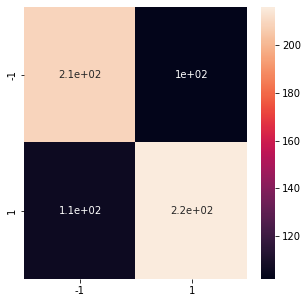

In [47]:
from sklearn import metrics
cm= metrics.confusion_matrix(y_test, y_pred, labels=[-1,1])
df_cm = pd.DataFrame(cm, index=[i for i  in ['-1','1']], columns =[i for i in ['-1','1']])
plt.figure(figsize=(5,5))
sns.heatmap(df_cm,annot=True)

In [48]:
print(metrics.classification_report(y_test,y_pred,labels=[-1,1]))

              precision    recall  f1-score   support

          -1       0.66      0.67      0.67       311
           1       0.68      0.67      0.67       322

    accuracy                           0.67       633
   macro avg       0.67      0.67      0.67       633
weighted avg       0.67      0.67      0.67       633



The model shows very low scores for both train and test.

In [49]:
# B. Use cross validation techniques. [3 Marks]
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=50, random_state=7, shuffle= True)
model2= LogisticRegression()
results= cross_val_score(model2, X_scaled, y_scaled, cv= kfold)

In [50]:
results

array([0.81395349, 0.62790698, 0.72093023, 0.69767442, 0.74418605,
       0.60465116, 0.72093023, 0.60465116, 0.66666667, 0.78571429,
       0.83333333, 0.71428571, 0.69047619, 0.71428571, 0.66666667,
       0.80952381, 0.66666667, 0.64285714, 0.69047619, 0.71428571,
       0.76190476, 0.73809524, 0.76190476, 0.69047619, 0.71428571,
       0.69047619, 0.71428571, 0.78571429, 0.85714286, 0.66666667,
       0.66666667, 0.66666667, 0.71428571, 0.69047619, 0.73809524,
       0.69047619, 0.5952381 , 0.71428571, 0.73809524, 0.73809524,
       0.61904762, 0.76190476, 0.5952381 , 0.69047619, 0.66666667,
       0.61904762, 0.64285714, 0.66666667, 0.69047619, 0.78571429])

In [51]:
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 70.403% (6.080%)


In [52]:
# A. Use any Supervised Learning technique to train a model. [2 Marks]
# Using K Nearest Neighbors algorithm 
from sklearn.neighbors import KNeighborsClassifier
model_nn = KNeighborsClassifier(n_neighbors = 5, weights='distance')
model_nn.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [53]:
y_pred_nn = model_nn.predict(X_test)
print("Test scores:",model_nn.score(X_test, y_test))
print("Train score:", model_nn.score(X_train,y_train))

Test scores: 0.8578199052132701
Train score: 1.0


In [54]:
# B. Use cross validation techniques. [3 Marks]
kfold_nn = KFold(n_splits=50, random_state=7, shuffle= True)
model_knn= KNeighborsClassifier(n_neighbors = 5, weights='distance')
results_knn= cross_val_score(model_knn, X_scaled, y_scaled, cv= kfold)

print("Accuracy: %.3f%% (%.3f%%)" % (results_knn.mean()*100.0, results.std()*100.0))

Accuracy: 85.150% (6.080%)


In [55]:
from sklearn.model_selection import LeaveOneOut
loocv = LeaveOneOut()
model_knn_2= KNeighborsClassifier(n_neighbors = 5, weights='distance')
results_knn_2= cross_val_score(model_knn_2, X_scaled, y_scaled, cv= loocv)

print("Accuracy: %.3f%% (%.3f%%)" % (results_knn_2.mean()*100.0, results.std()*100.0))

Accuracy: 85.247% (6.080%)


In [56]:
# C. Apply hyper-parameter tuning techniques to get the best accuracy. [3 Marks]
from sklearn.model_selection import GridSearchCV

knn_model= KNeighborsClassifier()
tuned_parameters= {
    'n_neighbors': (np.arange(2,20,1))
}

model_knncv = GridSearchCV(knn_model, tuned_parameters, cv=10, scoring='accuracy')

model_knncv.fit(X_scaled, y_scaled)
print(model_knncv.best_score_)

0.8837350485217785


In [57]:
print(model_knncv.best_params_)

{'n_neighbors': 2}


In [58]:
# D. Use any other technique/method which can enhance the model performance.
# using PCA
from sklearn.decomposition import PCA
pca1= PCA(n_components = 5)
pca1.fit(X_scaled)
Xpca1= pca1.transform(X_scaled)

In [59]:
model_03 = GridSearchCV(knn_model, tuned_parameters, cv=10, scoring='accuracy', return_train_score=True)

model_03.fit(Xpca1, y_scaled)
print(model_03.best_score_)
print(model_03.best_params_)


0.8330038366057323
{'n_neighbors': 2}


Since we have already applied dimensionality reduction, attribute removal, and normalization/ scaling on the data, applying PCA on the data reduces its performance.

In [60]:
pd.DataFrame(model_03.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.001593,0.000658,0.006683,0.001680,2,{'n_neighbors': 2},0.810427,0.753555,0.796209,0.853081,...,0.974697,0.975751,0.974170,0.971534,0.974697,0.967844,0.969968,0.976818,0.973382,0.002627
1,0.001799,0.000401,0.006385,0.001017,3,{'n_neighbors': 3},0.781991,0.706161,0.720379,0.796209,...,0.909331,0.909858,0.906695,0.911439,0.910912,0.908803,0.902529,0.908851,0.909024,0.002560
2,0.001495,0.000498,0.006183,0.000399,4,{'n_neighbors': 4},0.767773,0.763033,0.710900,0.810427,...,0.914075,0.913548,0.913021,0.906695,0.913021,0.911439,0.912540,0.913593,0.912608,0.002134
3,0.001595,0.000488,0.006280,0.000453,5,{'n_neighbors': 5},0.734597,0.748815,0.706161,0.796209,...,0.874012,0.870322,0.867159,0.871376,0.869267,0.871903,0.874078,0.875132,0.872338,0.002808
4,0.001507,0.000501,0.006182,0.000406,6,{'n_neighbors': 6},0.729858,0.767773,0.715640,0.810427,...,0.883500,0.875066,0.881919,0.880865,0.878229,0.882973,0.887250,0.889357,0.882510,0.003851


In [61]:
model_04 = KNeighborsClassifier(n_neighbors = 2, weights='distance')
model_04.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [62]:
y_pred_04 = model_04.predict(X_test)

In [63]:
# E. Display and explain the classification report in detail. [3 Marks]
print(metrics.classification_report(y_test, y_pred_04))

              precision    recall  f1-score   support

          -1       1.00      0.86      0.93       311
           1       0.88      1.00      0.94       322

    accuracy                           0.93       633
   macro avg       0.94      0.93      0.93       633
weighted avg       0.94      0.93      0.93       633



The final KNN Model has an accuracy of 92%. The precision is 1 for the negative class while the recall is 1 for the positive class. Overall precision is 0.93 and overall recall is 0.91. 

In [64]:
# F. Apply the above steps for all possible models that you have learnt so far. [5 Marks]

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


parameters = {
    'svm': {
        'model': svm.SVC(),
        'params' : {
            'gamma':[.025, 0.25,0.5,1.0,5],
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,8,10,15]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [66]:
scores = []

for model_name, mp in parameters.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=True)
    clf.fit(X_scaled,y_scaled)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'mean_train_score': clf.cv_results_['mean_train_score'].max(),
        'mean_test_score': clf.cv_results_['mean_test_score'].max()
    })
 

In [67]:
# A. Display and compare all the models designed with their train and test accuracies. [1 Marks]   
df = pd.DataFrame(scores,columns=['model','best_score','best_params', 'mean_train_score','mean_test_score'])
df

,model,best_score,best_params,mean_train_score,mean_test_score
0,svm,0.977696,"{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}",1.000000,0.977696
1,random_forest,0.889477,{'n_estimators': 15},0.999526,0.889477
2,logistic_regression,0.636199,{'C': 1},0.717976,0.636199


#### B. Select the final best trained model along with your detailed comments for selecting this model. [1 Marks]

The best model according to the above analysis is SVM with parameters {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
It gives the highest Cross Validation accuracy of 97% 

In [68]:
# C. Pickle the selected model for future use. [2 Marks]
import pickle

final_model= svm.SVC(C=1, gamma=0.5, kernel='rbf')
final_model.fit(X_train, y_train)

with open('model_pickle','wb') as f:
    pickle.dump(final_model, f)

#### D. Write your conclusion on the results.
In this project we had many features that were highly dependent on each other. Using multicollinearity analysis we removed those extra feature. The  data was then normalized. We tried four different  types of models on the data and found SVM to be the best fit  for  the  data. 
Using  SVM we got a training  accuracy of 97%.